Import packages

In [1]:
import matplotlib.pyplot as plt
import cv2

Function to display images in notebooks

In [2]:
def plt_imshow(title, image):
    # convert image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

Template matching input images

In [3]:
args = {
    "image": "redhat-sign/images/redhat-signing-page-2.png",
    "template": "redhat-sign/template/redhat-signature.png"
}

Load the images

[INFO] loading images...


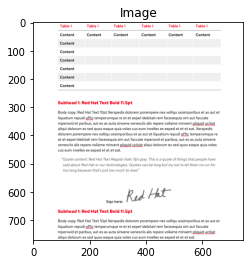

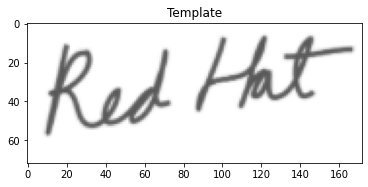

In [4]:
# load the input image and template image from disk, then display
# them to  our screen
print("[INFO] loading images...")
image = cv2.imread(args["image"])
template = cv2.imread(args["template"])
plt_imshow("Image", image)
plt_imshow("Template", template)

# convert both the image and template to grayscale
# common for template matching
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

In [5]:
# perform template matching
print("[INFO] performing template matching...")
# input image
# template object to detect
# template matching method cv2.TM_CCOEFF_NORMED is most common
result = cv2.matchTemplate(imageGray, templateGray,
	cv2.TM_CCOEFF_NORMED)
# find min and max in given matrix, also XY coordinates "Location"
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)

print(maxVal)

[INFO] performing template matching...
1.0


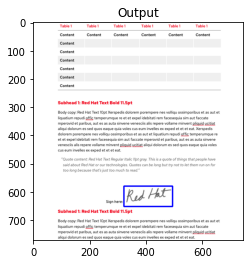

In [6]:
# Bounding boxes
# determine the starting and ending (x, y)-coordinates of the
# bounding box
# if the max value is 90% match continue, else dont detect
# filters out false positive detection that cause downstream problems
if maxVal > 0.4:

    (startX, startY) = maxLoc
    # add template width and template height to find the end
    endX = startX + template.shape[1]
    endY = startY + template.shape[0]

    #%%
    # draw the bounding box on the image
    cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 3)

# show the output image
plt_imshow("Output", image)